# MATLAB PROJE

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fft import fft, ifft
import scipy
from scipy.io import loadmat
from IPython.lib.display import Audio
import scipy.signal as sgnl
%matplotlib notebook

### SES DOSYASI OKUMA

x1.shape= (220500, 2)
Fs1= 44100


<IPython.core.display.Javascript object>


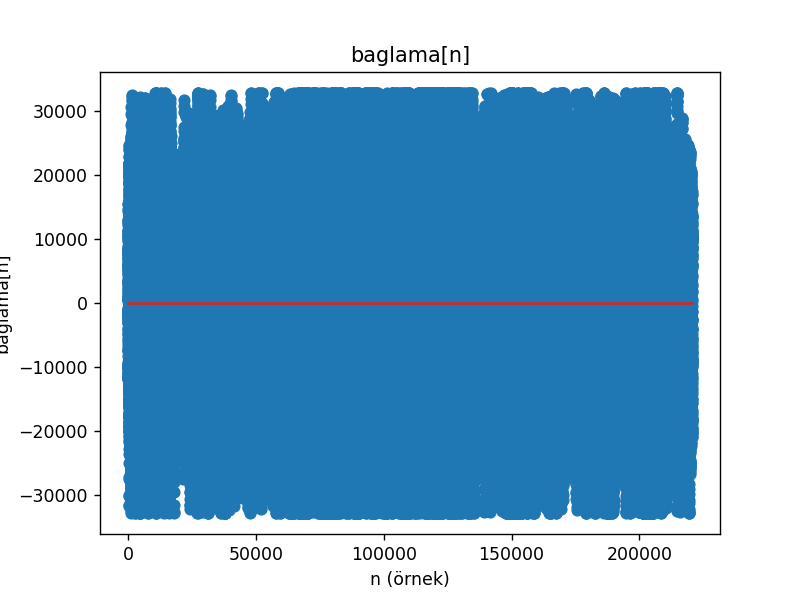

baglama:


In [2]:
Fs1, x1 = read("klasik1.wav") # dosyayı oku
print("x1.shape=",x1.shape) # x'in boyut bilgisi
print("Fs1=",Fs1)

baglama = x1[:,1] # x'in sadece ilk sütunundaki örnekler alınmıştır (1. kanalın örnekleri)
N_baglama = len(x1)
n1=np.arange(0,N_baglama) # örnekleme indisini ses dosyasının boyutuna eşitle
plt.figure()
plt.stem(n1,baglama) # gitar[n] işaretinin grafiğinin çizdirilmesi
plt.title("baglama[n]") # grafiğin başlığının isimlendirilmesi
plt.xlabel("n (örnek)") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("baglama[n]") # grafiğin y ekseninin isimlendirilmesi

print('baglama:')
display(Audio(baglama, rate=Fs1))

### FOURIER TRANSFORMU

<IPython.core.display.Javascript object>


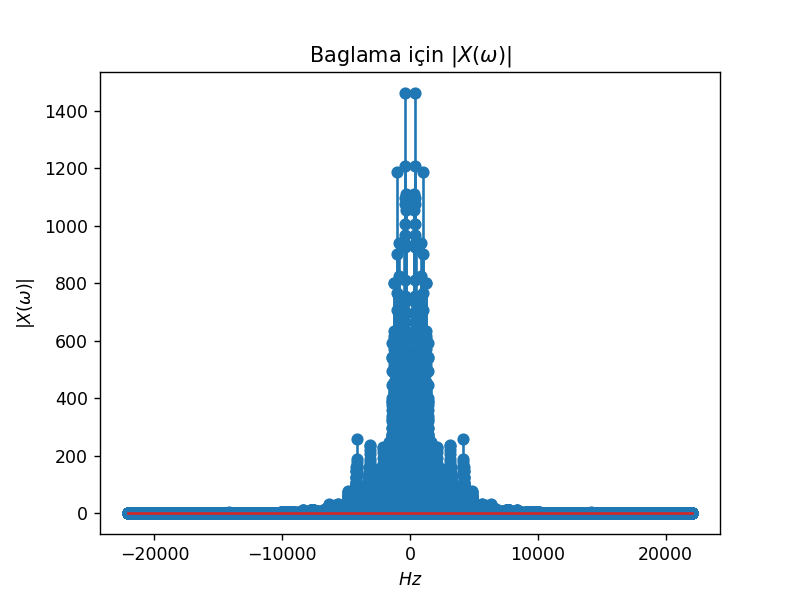

Text(0.5, 1.0, 'Baglama için $|X(\\omega)|$')

In [3]:
# baglama sinyalinin Fourier Transformu
w1 = np.arange(-np.pi, np.pi, 2*np.pi/N_baglama) # omega ekseninin -pi ile +pi arasında tanımlanması
xw1 = np.fft.fftshift(np.fft.fft(baglama,N_baglama)/N_baglama) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.stem(w1*Fs1/(2*np.pi),abs(xw1)) # X(w) işaretinin grafiğinin çizdirilmesi

plt.xlabel("$Hz$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$|X(\omega)|$") # grafiğin y ekseninin isimlendirilmesi
plt.title("Baglama için $|X(\omega)|$") # grafiğin y ekseninin isimlendirilmesi

### FILTRE EKLEME

<IPython.core.display.Javascript object>


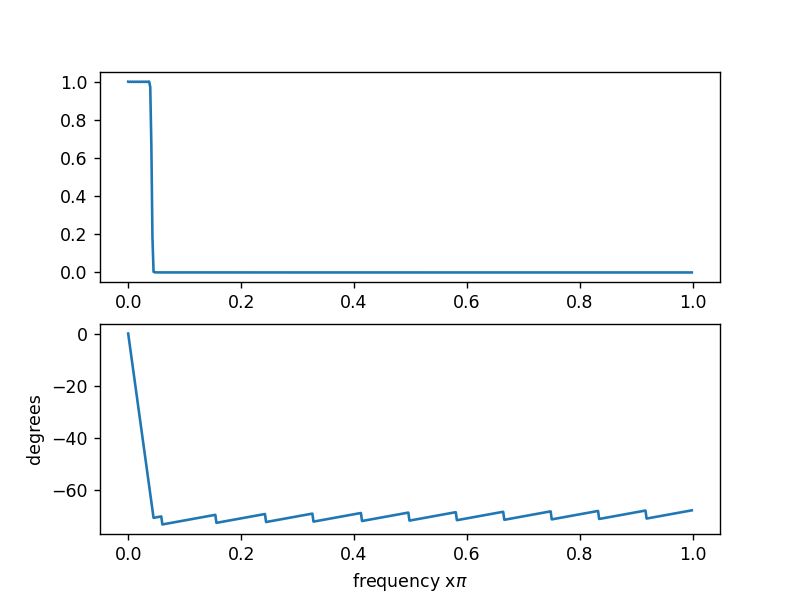

Text(0.5, 0, 'frequency x$\\pi$')

In [4]:
filter_data = loadmat('alperfilter.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
#a = Coeffs[1,:]

w3, Hw=sgnl.freqz(b,1)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(w3/np.pi, Hw_mag)
ax2.plot(w3/np.pi, Hw_phs) 
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$')

<IPython.core.display.Javascript object>


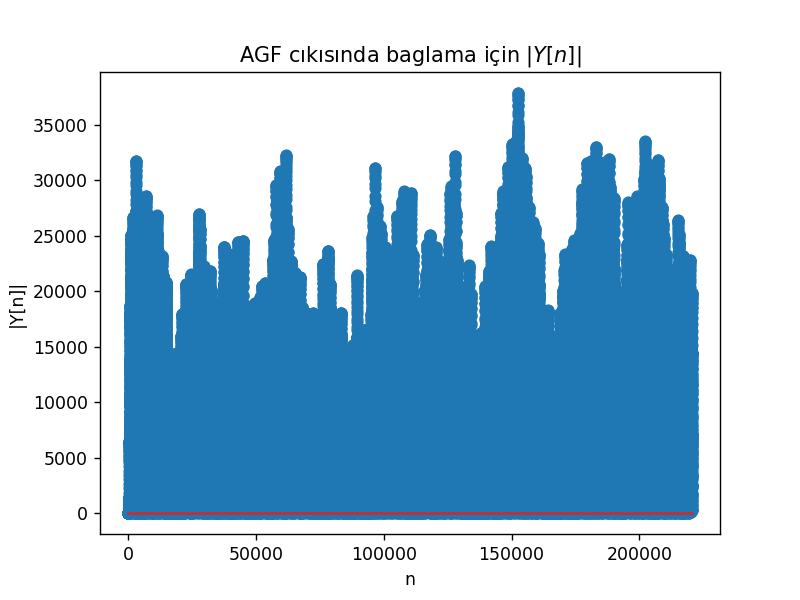

<IPython.core.display.Javascript object>


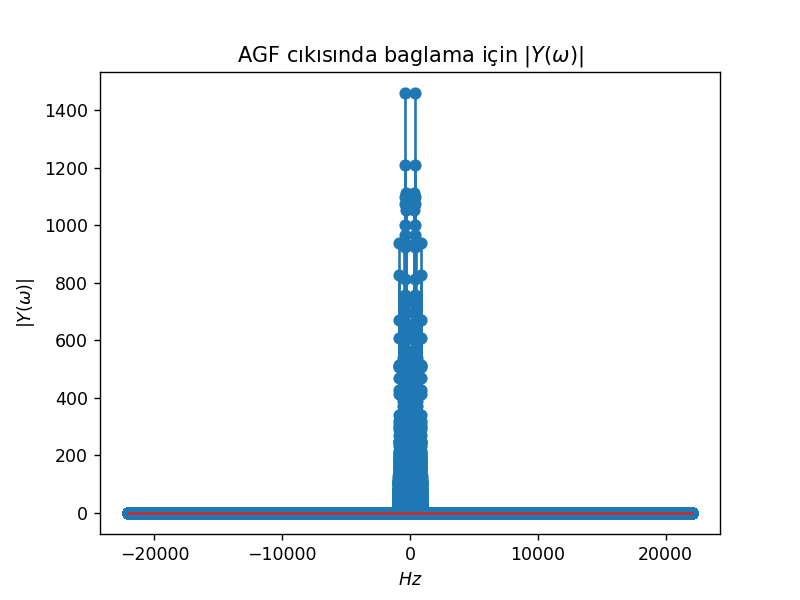

AGF cıkısındaki baglama sesi:


Orjinal baglama sesi:


In [5]:
# baglama sesinin filtreden geçirmek

filtered_baglama = sgnl.lfilter(b,1, baglama) # katsayıları kullanarak, sinyali filtrenin girişine uyguladık.
plt.figure()
plt.stem(abs(filtered_baglama)) # genliğini çiz
plt.xlabel("n") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("|Y[n]|") # grafiğin y ekseninin isimlendirilmesi
plt.title("AGF cıkısında baglama için $ |Y[n]| $") # grafiğin başlığının isimlendirilmesi

w1 = np.arange(-np.pi, np.pi, 2*np.pi/N_baglama) # omega ekseninin -pi ile +pi arasında tanımlanması
baglama_yw = np.fft.fftshift(np.fft.fft(filtered_baglama,N_baglama)/N_baglama) # ayrık zamanlı işaretin Fourier transformu

plt.figure()
plt.stem(w1*Fs1/(2*np.pi),abs(baglama_yw)) # Y(w) işaretinin grafiğinin çizdirilmesi

plt.xlabel("$Hz$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$|Y(\omega)|$") # grafiğin y ekseninin isimlendirilmesi
plt.title("AGF cıkısında baglama için $|Y(\omega)|$")  # grafiğin başlığının isimlendirilmesi


#---------------------------------------------------------------------------------------------------------------------

# Alçak Geçiren Filtreden geçmiş sesleri dinlemek (Bu filtre bağlama sesini sönümlemesi içindir)

# Her ikisini de kolayca dinleyip karşılaştırmak için ardarda eklendi 
from IPython.lib.display import Audio

print('AGF cıkısındaki baglama sesi:')
display(Audio(filtered_baglama, rate=Fs1))
print('Orjinal baglama sesi:')
display(Audio(baglama, rate=Fs1))

#---------------------------------------------------------------------------------------------------------------------

# Buradan elde edilen ses çıktılarını dinlediğimizde bağlama sesinin azaldığı görülebilemektedir. Çünkü X(w) genlik 
# grafiğine bakılarak bağlamayı geçirecek bir filtre tasarlandı. Bu ikisi arasındaki farkı PART 3 başlığı altında 
# görebilirsiniz. Bu kısımda sadece bağlama sesindeki azalma gösterildi.